In [21]:
import numpy as np
import pandas as pd

In [22]:
cereals = pd.read_csv("Clustering/Cereals.csv")
print(cereals.shape)
print(cereals.head())
print(cereals.describe())

(77, 14)
                        name  calories  protein  fat  sodium  fiber  carbo  \
0                  100%_Bran        70        4    1     130   10.0    5.0   
1          100%_Natural_Bran       120        3    5      15    2.0    8.0   
2                   All-Bran        70        4    1     260    9.0    7.0   
3  All-Bran_with_Extra_Fiber        50        4    0     140   14.0    8.0   
4             Almond_Delight       110        2    2     200    1.0   14.0   

   sugars  potass  vitamins  shelf  weight  cups     rating  
0     6.0   280.0        25      3     1.0  0.33  68.402973  
1     8.0   135.0         0      3     1.0  1.00  33.983679  
2     5.0   320.0        25      3     1.0  0.33  59.425505  
3     0.0   330.0        25      3     1.0  0.50  93.704912  
4     8.0     NaN        25      3     1.0  0.75  34.384843  
         calories    protein        fat      sodium      fiber      carbo  \
count   77.000000  77.000000  77.000000   77.000000  77.000000  76.000000

In [23]:
cereals['label'] = cereals['name'] + "("+ round(cereals['rating'],2).astype("str") + ")"
print(cereals.head())

                        name  calories  protein  fat  sodium  fiber  carbo  \
0                  100%_Bran        70        4    1     130   10.0    5.0   
1          100%_Natural_Bran       120        3    5      15    2.0    8.0   
2                   All-Bran        70        4    1     260    9.0    7.0   
3  All-Bran_with_Extra_Fiber        50        4    0     140   14.0    8.0   
4             Almond_Delight       110        2    2     200    1.0   14.0   

   sugars  potass  vitamins  shelf  weight  cups     rating  \
0     6.0   280.0        25      3     1.0  0.33  68.402973   
1     8.0   135.0         0      3     1.0  1.00  33.983679   
2     5.0   320.0        25      3     1.0  0.33  59.425505   
3     0.0   330.0        25      3     1.0  0.50  93.704912   
4     8.0     NaN        25      3     1.0  0.75  34.384843   

                             label  
0                  100%_Bran(68.4)  
1         100%_Natural_Bran(33.98)  
2                  All-Bran(59.43)  
3  A

In [24]:
cereals.drop(['name','shelf','rating'], axis=1, inplace=True)

In [25]:
cereals.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,label
0,70,4,1,130,10.0,5.0,6.0,280.0,25,1.0,0.33,100%_Bran(68.4)
1,120,3,5,15,2.0,8.0,8.0,135.0,0,1.0,1.00,100%_Natural_Bran(33.98)
2,70,4,1,260,9.0,7.0,5.0,320.0,25,1.0,0.33,All-Bran(59.43)
3,50,4,0,140,14.0,8.0,0.0,330.0,25,1.0,0.50,All-Bran_with_Extra_Fiber(93.7)
4,110,2,2,200,1.0,14.0,8.0,NaN,25,1.0,0.75,Almond_Delight(34.38)


In [26]:
cereals.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,1.029610,0.821039
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.150477,0.232716
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,0.500000,0.250000
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,0.670000
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,1.000000,0.750000
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,1.000000,1.000000
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,1.500000,1.500000


In [29]:
cereals.isna().sum(axis=0)

calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
weight      0
cups        0
label       0
dtype: int64

In [35]:
#numpy axis=0, consider columns
#pandas axis=1, consider columns

#drop label column
label = cereals['label']
cereals.drop(['label'],axis=1, inplace=True)

In [45]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="mean")
# fit_transform() returns numpy array. conver to dataframe
imputed_cereals = pd.DataFrame(imputer.fit_transform(cereals), columns= cereals.columns) 
imputed_cereals.isna().sum(axis=0)
imputed_cereals.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
0,70.0,4.0,1.0,130.0,10.0,5.0,6.0,280.000000,25.0,1.0,0.33
1,120.0,3.0,5.0,15.0,2.0,8.0,8.0,135.000000,0.0,1.0,1.00
2,70.0,4.0,1.0,260.0,9.0,7.0,5.0,320.000000,25.0,1.0,0.33
3,50.0,4.0,0.0,140.0,14.0,8.0,0.0,330.000000,25.0,1.0,0.50
4,110.0,2.0,2.0,200.0,1.0,14.0,8.0,98.666667,25.0,1.0,0.75


In [49]:
#scale
from sklearn.preprocessing import StandardScaler

scaler =  StandardScaler()
std_cereals = pd.DataFrame(scaler.fit_transform(imputed_cereals), columns= imputed_cereals.columns)
std_cereals.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups
count,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01,7.700000e+01
mean,-1.258012e-16,5.767392e-17,1.013349e-16,-5.190653e-17,1.463476e-16,-4.527403e-16,-2.144749e-16,-4.758099e-17,5.190653e-17,-1.982541e-16,1.665335e-16
std,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00,1.006557e+00
min,-2.938605e+00,-1.420902e+00,-1.013072e+00,-1.917189e+00,-9.088244e-01,-2.542013e+00,-1.625929e+00,-1.212115e+00,-1.272550e+00,-3.542628e+00,-2.469891e+00
25%,-3.555846e-01,-5.014948e-01,-1.013072e+00,-3.563056e-01,-4.864980e-01,-7.267769e-01,-9.317120e-01,-7.774919e-01,-1.462701e-01,-1.980675e-01,-6.532825e-01
50%,1.610194e-01,4.179123e-01,-1.298811e-02,2.440343e-01,-6.417167e-02,-4.606439e-16,-6.089621e-03,-1.255577e-01,-1.462701e-01,-1.980675e-01,-3.072619e-01
75%,1.610194e-01,4.179123e-01,9.870962e-01,6.042382e-01,3.581547e-01,5.698204e-01,9.195328e-01,3.090651e-01,-1.462701e-01,-1.980675e-01,7.740527e-01
max,2.744040e+00,3.176134e+00,3.987349e+00,1.924986e+00,5.003745e+00,2.125737e+00,1.845155e+00,3.351425e+00,3.232570e+00,3.146493e+00,2.936682e+00


In [60]:
#define distance metric
from scipy.cluster.hierarchy import linkage, dendrogram


linkage_matrix = linkage(std_cereals, method="ward" , metric="euclidean")
#gower distance
linkage_matrix.shape

(76, 4)

<IPython.core.display.Javascript object>


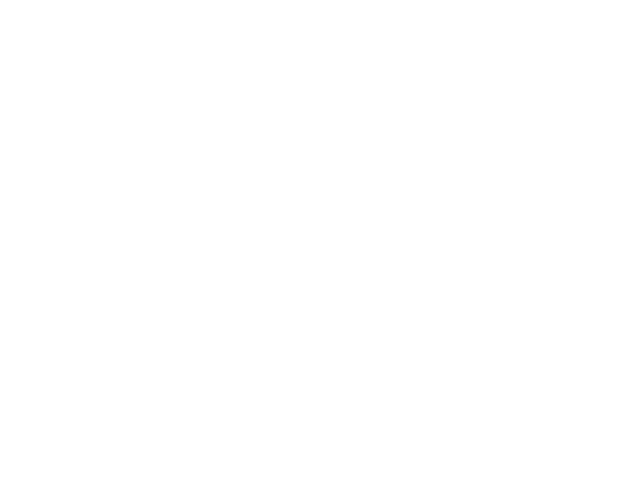

<IPython.core.display.Javascript object>


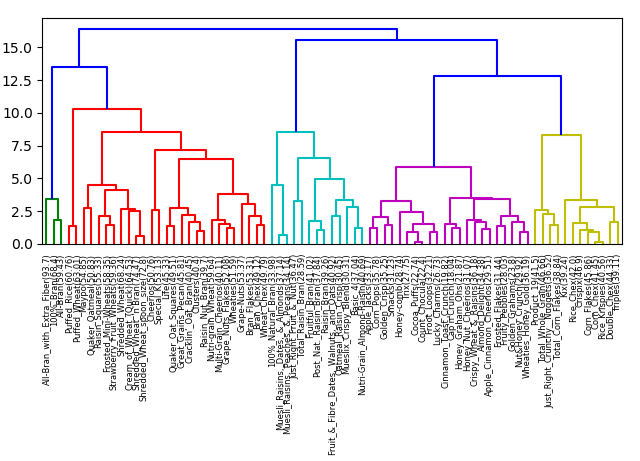

In [61]:
from matplotlib import pyplot as plt

fig,axs = plt.subplots()
%matplotlib notebook

dendrogram(linkage_matrix, labels= label.as_matrix())
plt.tight_layout()
plt.show()
#vertical line = margin of error between the clusters 

In [67]:
from sklearn.cluster import AgglomerativeClustering

aggl_cluster = AgglomerativeClustering(n_clusters=5, affinity= 'euclidean' , linkage='ward')
clusters = aggl_cluster.fit_predict(std_cereals)
clusters.shape

(77,)

In [72]:
aggl_results = pd.DataFrame({"label":label, "agg_cluster":clusters})

print(aggl_results['agg_cluster'].unique())

print(aggl_results.head(10))

[3 2 4 0 1]
   agg_cluster                            label
0            3                  100%_Bran(68.4)
1            2         100%_Natural_Bran(33.98)
2            3                  All-Bran(59.43)
3            3  All-Bran_with_Extra_Fiber(93.7)
4            4            Almond_Delight(34.38)
5            4   Apple_Cinnamon_Cheerios(29.51)
6            4               Apple_Jacks(33.17)
7            2                   Basic_4(37.04)
8            0                 Bran_Chex(49.12)
9            0               Bran_Flakes(53.31)


### *** K-Means clustering ***

In [78]:
from sklearn.cluster import KMeans

kmeans_obj = KMeans(n_clusters= 5, random_state= 5465)

kmeans = kmeans_obj.fit(std_cereals) #fitting model/Learning

kmeans_labels =  kmeans.predict(std_cereals) #predicting
print(kmeans_labels)

[2 3 2 2 0 0 0 3 1 1 0 4 0 3 0 4 4 0 0 3 1 4 0 4 0 0 1 3 3 0 0 0 1 1 3 0 0
 0 4 3 4 3 0 1 3 3 3 4 0 3 4 3 3 4 1 1 1 1 3 3 1 4 4 1 1 1 0 4 1 4 3 4 4 0
 4 4 0]


In [82]:
kmeans_results = pd.DataFrame({"label":label, "kmeans_cluster": kmeans_labels})
print(kmeans_results.head())

print("----")
print(kmeans_obj.cluster_centers_)

   kmeans_cluster                            label
0               2                  100%_Bran(68.4)
1               3         100%_Natural_Bran(33.98)
2               2                  All-Bran(59.43)
3               2  All-Bran_with_Extra_Fiber(93.7)
4               0            Almond_Delight(34.38)
----
[[ 0.20798344 -0.91940708  0.03247027  0.12396629 -0.65926792 -0.59711721
   0.99316184 -0.70922536 -0.14627013 -0.19806746  0.20980312]
 [-0.90447638  0.24552348 -0.63804082 -1.20428575  0.1390729   0.17764237
  -0.85901718  0.04074589 -0.63901763 -0.6872094  -0.23156984]
 [-2.24979938  1.33731939 -0.34634956  0.20401161  3.73676565 -2.10981415
  -0.77744163  3.06167606 -0.14627013 -0.19806746 -1.87877244]
 [ 1.02202616  0.57114682  1.04265647 -0.03278913  0.452005   -0.17932472
   0.57242438  0.82417358  0.16658543  1.08401397 -0.52352479]
 [-0.09728258  0.11144328 -0.45747004  0.91774906 -0.39264773  1.10286601
  -0.89314443 -0.50384049  0.6045832  -0.19806746  0.78606736]]


#### ***plot elbow curve***

In [83]:
scaler.inverse_transform(kmeans_obj.cluster_centers_)
#average of calories in cluster1 = 110.90909091 and proteains = 1.54545455

array([[110.90909091,   1.54545455,   1.04545455, 170.        ,
          0.59090909,  12.5       ,  11.31818182,  49.71212121,
         25.        ,   1.        ,   0.86954545],
       [ 89.375     ,   2.8125    ,   0.375     ,  59.375     ,
          2.48125   ,  15.48766447,   3.31414474, 101.47916667,
         14.0625    ,   0.926875  ,   0.7675    ],
       [ 63.33333333,   4.        ,   0.66666667, 176.66666667,
         11.        ,   6.66666667,   3.66666667, 310.        ,
         25.        ,   1.        ,   0.38666667],
       [126.66666667,   3.16666667,   2.05555556, 156.94444444,
          3.22222222,  14.11111111,   9.5       , 155.55555556,
         31.94444444,   1.19166667,   0.7       ],
       [105.        ,   2.66666667,   0.55555556, 236.11111111,
          1.22222222,  19.05555556,   3.16666667,  63.88888889,
         41.66666667,   1.        ,   1.00277778]])

In [ ]:
#silhouette score -> -1 to +1
#higher silhouette score -> better the clusters
#ai - min avg dist within cluster
#bi - min avg dist between the clusters
